In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

/home/tranlin/anaconda3/envs/b2p/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
bounds

id  split Country  \
0  rw-tr-lo-0  train  Rwanda   
1     rw-va-0    val  Rwanda   
2     rw-te-0   test  Rwanda   
3  rw-tr-up-0  train  Rwanda   
4          rw    all  Rwanda   
5     ug-te-0   test  Uganda   
6     ug-tr-0  train  Uganda   
7     ug-va-0    val  Uganda   
8          ug    all  Uganda   

                                            geometry  
0  POLYGON ((29.59586 -2.80226, 29.57055 -2.80000...  
1  POLYGON ((29.78121 -2.78761, 29.73916 -2.80292...  
2  POLYGON ((30.15192 -2.42723, 30.11250 -2.42042...  
3  POLYGON ((30.15192 -1.33159, 30.17167 -1.31500...  
4  POLYGON ((29.02444 -2.74472, 29.01712 -2.72403...  
5  POLYGON ((29.93376 -0.37069, 29.65997 -0.37069...  
6  POLYGON ((30.49588 0.96941, 30.49588 -0.37069,...  
7  POLYGON ((30.68325 0.96941, 30.68325 -0.37069,...  
8  POLYGON ((32.89035 -0.99971, 32.74242 -0.99972...

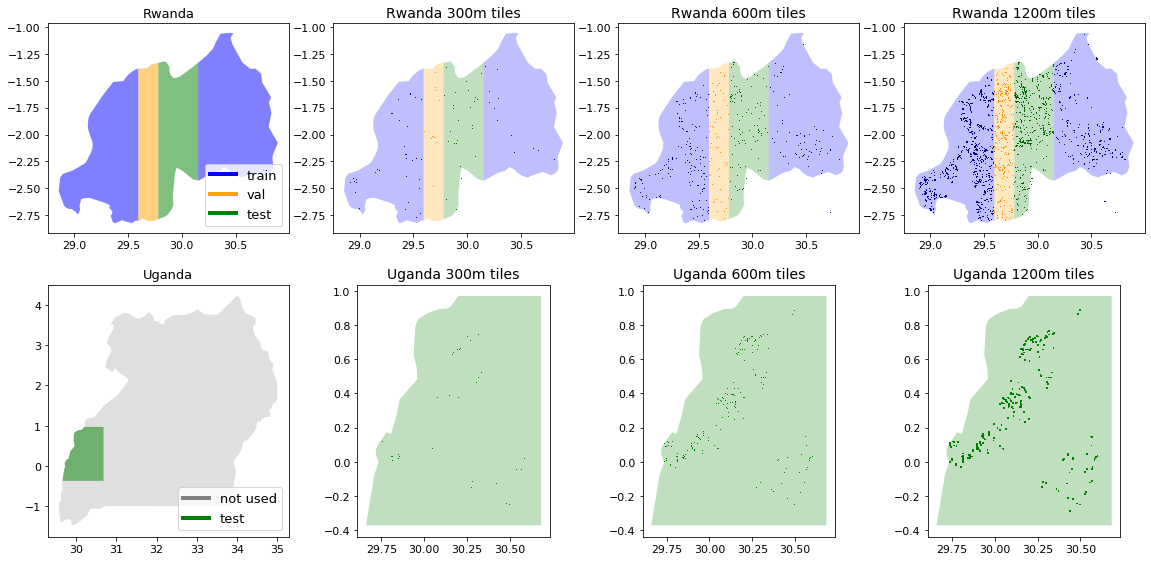

In [16]:
def plot_v1(legend_fontsize=13, title_fontsize=14):
    with open("../data/ground_truth/bounds_v1.geojson") as f:
        bounds = gpd.read_file(f)

    with open("../data/ground_truth/train_300_v1.geojson") as f:
        train300 = gpd.read_file(f)

    with open("../data/ground_truth/train_600_v1.geojson") as f:
        train600 = gpd.read_file(f)

    with open("../data/ground_truth/train_1200_v1.geojson") as f:
        train1200 = gpd.read_file(f)

    fig, axes = plt.subplots(2, 4, figsize=(16, 8))

    # first subplot
    bounds[bounds.id == "rw"].plot(color='white', ax=axes[0][0])
    bounds[bounds.id.str.startswith("rw-tr")].plot(
        color="blue", ax=axes[0][0], alpha=0.5)
    bounds[bounds.id.str.startswith("rw-va")].plot(
        color="orange", ax=axes[0][0], alpha=0.5)
    bounds[bounds.id.str.startswith("rw-te")].plot(
        color="green", ax=axes[0][0], alpha=0.5)
    legend_elem = [
        Line2D([0],[0], color='blue', lw=4, label='train'),
        Line2D([0],[0], color='orange', lw=4, label='val'),
        Line2D([0],[0], color='green', lw=4, label='test')
    ]
    axes[0][0].legend(handles=legend_elem, loc='lower right', 
                      fontsize=legend_fontsize)

    # second subplot - train Rwanda 300
    bounds[bounds.id.str.startswith("rw-tr")].plot(
        color="blue", ax=axes[0][1], alpha=0.25)
    train300[
        (train300.split.str.startswith("train")) & 
        (train300.pos_neg == "pos") &
        (train300.Country == "Rwanda")].plot(color="darkblue", ax=axes[0][1])
    bounds[bounds.id.str.startswith("rw-va")].plot(
        color="orange", ax=axes[0][1], alpha=0.25)
    train300[
        (train300.split.str.startswith("val")) & 
        (train300.pos_neg == "pos")].plot(color="darkorange", ax=axes[0][1])
    bounds[bounds.id.str.startswith("rw-te")].plot(
        color="green", ax=axes[0][1], alpha=0.25)
    train300[
        (train300.split.str.startswith("test") &
        (train300.Country == "Rwanda")) & 
        (train300.pos_neg == "pos")].plot(color="darkgreen", ax=axes[0][1])

    # third subplot - train Rwanda 600
    bounds[bounds.id.str.startswith("rw-tr")].plot(
        color="blue", ax=axes[0][2], alpha=0.25)
    train600[
        (train600.split.str.startswith("train")) & 
        (train600.pos_neg == "pos") &
        (train300.Country == "Rwanda")].plot(color="darkblue", ax=axes[0][2])
    bounds[bounds.id.str.startswith("rw-va")].plot(
        color="orange", ax=axes[0][2], alpha=0.25)
    train600[
        (train600.split.str.startswith("val")) & 
        (train600.pos_neg == "pos") &
        (train300.Country == "Rwanda")].plot(color="darkorange", ax=axes[0][2])
    bounds[bounds.id.str.startswith("rw-te")].plot(
        color="green", ax=axes[0][2], alpha=0.25)
    train600[
        (train600.split.str.startswith("test")) & 
        (train600.pos_neg == "pos") &
        (train300.Country == "Rwanda")].plot(color="darkgreen", ax=axes[0][2])

    # third subplot - train Rwanda 1200
    bounds[bounds.id.str.startswith("rw-tr")].plot(
        color="blue", ax=axes[0][3], alpha=0.25)
    train1200[
        (train1200.split.str.startswith("train")) & 
        (train1200.pos_neg == "pos") &
        (train300.Country == "Rwanda")].plot(color="darkblue", ax=axes[0][3])
    bounds[bounds.id.str.startswith("rw-va")].plot(
        color="orange", ax=axes[0][3], alpha=0.25)
    train1200[
        (train1200.split.str.startswith("val")) & 
        (train1200.pos_neg == "pos") &
        (train300.Country == "Rwanda")].plot(color="darkorange", ax=axes[0][3])
    bounds[bounds.id.str.startswith("rw-te")].plot(
        color="green", ax=axes[0][3], alpha=0.25)
    train1200[
        (train1200.split.str.startswith("test")) & 
        (train1200.pos_neg == "pos") &
        (train300.Country == "Rwanda")].plot(color="darkgreen", ax=axes[0][3])

    _ = axes[0][0].set_title("Rwanda", fontsize=13)
    _ = axes[0][1].set_title("Rwanda 300m tiles", fontsize=title_fontsize)
    _ = axes[0][2].set_title("Rwanda 600m tiles", fontsize=title_fontsize)
    _ = axes[0][3].set_title("Rwanda 1200m tiles", fontsize=title_fontsize)
    axes[0][0].tick_params(axis='both', which='major', labelsize=11)
    axes[0][1].tick_params(axis='both', which='major', labelsize=11)
    axes[0][2].tick_params(axis='both', which='major', labelsize=11)
    axes[0][3].tick_params(axis='both', which='major', labelsize=11)
    
    # uganda first plot
    bounds[bounds.id == "ug"].plot(color="grey", alpha=0.25, ax=axes[1][0])
    bounds[bounds.id == "ug-te-0"].plot(color="green", ax=axes[1][0], alpha=0.5)
    legend_elem = [
        Line2D([0],[0], color='grey', lw=4, label='not used'),
        Line2D([0],[0], color='green', lw=4, label='test')
    ]
    axes[1][0].legend(handles=legend_elem, loc='lower right',
                      fontsize=legend_fontsize)
    

    bounds[bounds.id == "ug-te-0"].plot(
        color="green", ax=axes[1][1], alpha=0.25)
    train300[
        (train300.split.str.startswith("test")) & 
        (train300.pos_neg == "pos") &
        (train300.Country == "Uganda")].plot(color="green", ax=axes[1][1])

    bounds[bounds.id == "ug-te-0"].plot(
        color="green", ax=axes[1][2], alpha=0.25)
    train600[
        (train600.split.str.startswith("test")) & 
        (train600.pos_neg == "pos") &
        (train300.Country == "Uganda")].plot(
        color="green", ax=axes[1][2])

    bounds[bounds.id == "ug-te-0"].plot(
        color="green", ax=axes[1][3], alpha=0.25)
    train1200[
        (train1200.split.str.startswith("test")) & 
        (train1200.pos_neg == "pos") &
        (train300.Country == "Uganda")].plot(
        color="green", ax=axes[1][3])

    _ = axes[1][0].set_title(
        "Uganda", fontsize=13)
    _ = axes[1][1].set_title("Uganda 300m tiles", fontsize=title_fontsize)
    _ = axes[1][2].set_title("Uganda 600m tiles", fontsize=title_fontsize)
    _ = axes[1][3].set_title("Uganda 1200m tiles", fontsize=title_fontsize)
    axes[1][0].tick_params(axis='both', which='major', labelsize=11)
    axes[1][1].tick_params(axis='both', which='major', labelsize=11)
    axes[1][2].tick_params(axis='both', which='major', labelsize=11)
    axes[1][3].tick_params(axis='both', which='major', labelsize=11)
    plt.tight_layout()
    plt.savefig("data_v1.png", dpi=300)

plot_v1()

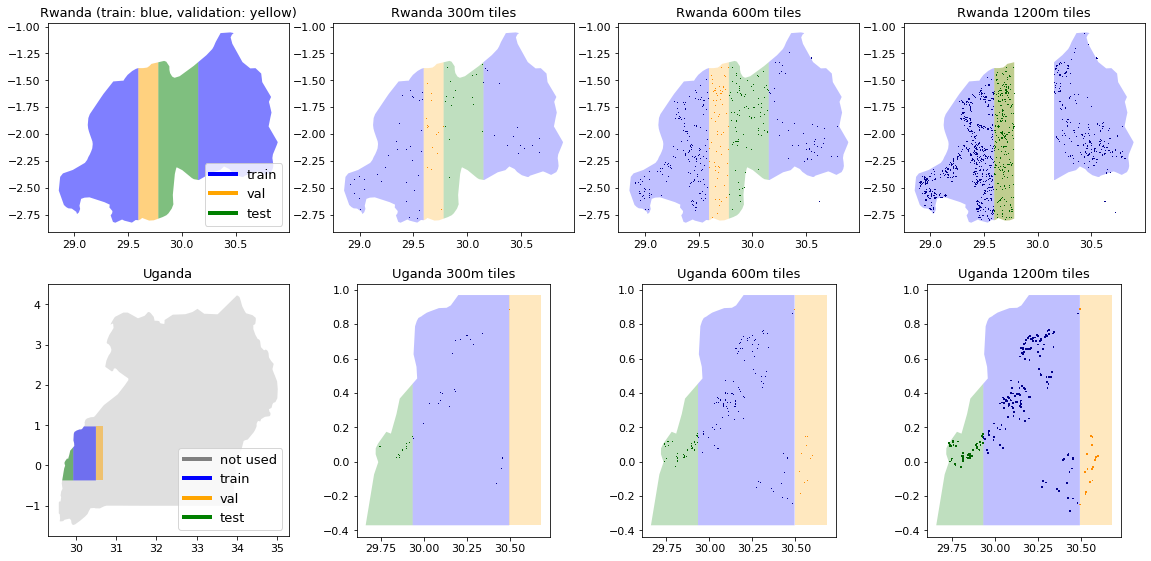

In [21]:
def plot_v2(legend_fontsize=13):
    with open("../data/ground_truth/bounds_v2.geojson") as f:
        bounds = gpd.read_file(f)

    with open("../data/ground_truth/train_300_v2.geojson") as f:
        train300 = gpd.read_file(f)

    with open("../data/ground_truth/train_600_v2.geojson") as f:
        train600 = gpd.read_file(f)

    with open("../data/ground_truth/train_1200_v2.geojson") as f:
        train1200 = gpd.read_file(f)

    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    # first plot rwanda
    bounds[bounds.id == "rw"].plot(color='white', ax=axes[0][0])
    bounds[bounds.id.str.startswith("rw-tr")].plot(
        color="blue", ax=axes[0][0], alpha=0.5)
    bounds[bounds.id.str.startswith("rw-va")].plot(
        color="orange", ax=axes[0][0], alpha=0.5)
    bounds[bounds.id.str.startswith("rw-te")].plot(
        color="green", ax=axes[0][0], alpha=0.5)
    legend_elem = [
        Line2D([0],[0], color='blue', lw=4, label='train'),
        Line2D([0],[0], color='orange', lw=4, label='val'),
        Line2D([0],[0], color='green', lw=4, label='test')
    ]
    axes[0][0].legend(handles=legend_elem, loc='lower right', 
                      fontsize=legend_fontsize)
    
    # second plot
    bounds[bounds.id.str.startswith("rw-tr")].plot(
        color="blue", ax=axes[0][1], alpha=0.25)
    train300[
        (train300.split.str.startswith("train")) & 
        (train300.pos_neg == "pos") &
        (train300.Country == "Rwanda")].plot(color="darkblue", ax=axes[0][1])
    bounds[bounds.id.str.startswith("rw-va")].plot(
        color="orange", ax=axes[0][1], alpha=0.25)
    train300[
        (train300.split.str.startswith("val")) & 
        (train300.pos_neg == "pos") &
        (train300.Country == "Rwanda")].plot(color="darkorange", ax=axes[0][1])
    bounds[bounds.id.str.startswith("rw-te")].plot(
        color="green", ax=axes[0][1], alpha=0.25)
    train300[
        (train300.split.str.startswith("test")) & 
        (train300.pos_neg == "pos") &
        (train300.Country == "Rwanda")].plot(color="darkgreen", ax=axes[0][1])

    bounds[bounds.id.str.startswith("rw-tr")].plot(
        color="blue", ax=axes[0][2], alpha=0.25)
    train600[
        (train600.split.str.startswith("train")) & 
        (train600.pos_neg == "pos") &
        (train600.Country == "Rwanda")].plot(color="darkblue", ax=axes[0][2])
    bounds[bounds.id.str.startswith("rw-va")].plot(
        color="orange", ax=axes[0][2], alpha=0.25)
    train600[
        (train600.split.str.startswith("val")) & 
        (train600.pos_neg == "pos") &
        (train600.Country == "Rwanda")].plot(color="darkorange", ax=axes[0][2])
    bounds[bounds.id.str.startswith("rw-te")].plot(
        color="green", ax=axes[0][2], alpha=0.25)
    train600[
        (train600.split.str.startswith("test")) & 
        (train600.pos_neg == "pos") &
        (train600.Country == "Rwanda")].plot(color="darkgreen", ax=axes[0][2])

    bounds[bounds.id.str.startswith("rw-tr")].plot(
        color="blue", ax=axes[0][3], alpha=0.25)
    train1200[
        (train1200.split.str.startswith("train")) & 
        (train1200.pos_neg == "pos") &
        (train1200.Country == "Rwanda")].plot(color="darkblue", ax=axes[0][3])
    bounds[bounds.id.str.startswith("rw-va")].plot(
        color="orange", ax=axes[0][3], alpha=0.25)
    train1200[
        (train1200.split.str.startswith("val")) & 
        (train1200.pos_neg == "pos") &
        (train1200.Country == "Rwanda")].plot(color="darkorange", ax=axes[0][3])
    bounds[bounds.id.str.startswith("rw-va")].plot(
        color="green", ax=axes[0][3], alpha=0.25)
    train1200[
        (train1200.split.str.startswith("val")) & 
        (train1200.pos_neg == "pos") &
        (train1200.Country == "Rwanda")].plot(color="darkgreen", ax=axes[0][3])

    _ = axes[0][0].set_title(
        "Rwanda (train: blue, validation: yellow)", fontsize=13)
    _ = axes[0][1].set_title("Rwanda 300m tiles", fontsize=13)
    _ = axes[0][2].set_title("Rwanda 600m tiles", fontsize=13)
    _ = axes[0][3].set_title("Rwanda 1200m tiles", fontsize=13)
    axes[0][0].tick_params(axis='both', which='major', labelsize=11)
    axes[0][1].tick_params(axis='both', which='major', labelsize=11)
    axes[0][2].tick_params(axis='both', which='major', labelsize=11)
    axes[0][3].tick_params(axis='both', which='major', labelsize=11)

    bounds[bounds.id == "ug"].plot(color="grey", alpha=0.25, ax=axes[1][0])
    bounds[bounds.id.str.startswith("ug-te")].plot(
        color="green", ax=axes[1][0], alpha=0.5)
    bounds[bounds.id.str.startswith("ug-tr")].plot(
        color="blue", ax=axes[1][0], alpha=0.5)
    bounds[bounds.id.str.startswith("ug-va")].plot(
        color="orange", ax=axes[1][0], alpha=0.5)
    legend_elem = [
        Line2D([0],[0], color='grey', lw=4, label='not used'),
        Line2D([0],[0], color='blue', lw=4, label='train'),
        Line2D([0],[0], color='orange', lw=4, label='val'),
        Line2D([0],[0], color='green', lw=4, label='test')
    ]
    axes[1][0].legend(handles=legend_elem, loc='lower right',
                      fontsize=legend_fontsize)

    bounds[bounds.id.str.startswith("ug-te")].plot(
        color="green", ax=axes[1][1], alpha=0.25)
    bounds[bounds.id.str.startswith("ug-tr")].plot(
        color="blue", ax=axes[1][1], alpha=0.25)
    bounds[bounds.id.str.startswith("ug-va")].plot(
        color="orange", ax=axes[1][1], alpha=0.25)

    train300[
        (train300.split.str.startswith("test")) & 
        (train300.pos_neg == "pos") &
        (train300.Country == "Uganda")].plot(color="darkgreen", ax=axes[1][1])
    train300[
        (train300.split.str.startswith("train")) & 
        (train300.pos_neg == "pos") &
        (train300.Country == "Uganda")].plot(color="darkblue", ax=axes[1][1])
    train300[
        (train300.split.str.startswith("val")) & 
        (train300.pos_neg == "pos") &
        (train300.Country == "Uganda")].plot(color="darkorange", ax=axes[1][1])

    bounds[bounds.id.str.startswith("ug-te")].plot(
        color="green", ax=axes[1][2], alpha=0.25)
    bounds[bounds.id.str.startswith("ug-tr")].plot(
        color="blue", ax=axes[1][2], alpha=0.25)
    bounds[bounds.id.str.startswith("ug-va")].plot(
        color="orange", ax=axes[1][2], alpha=0.25)

    train600[
        (train600.split.str.startswith("test")) & 
        (train600.pos_neg == "pos") &
        (train600.Country == "Uganda")].plot(color="darkgreen", ax=axes[1][2])
    train600[
        (train600.split.str.startswith("train")) & 
        (train600.pos_neg == "pos") &
        (train600.Country == "Uganda")].plot(color="darkblue", ax=axes[1][2])
    train600[
        (train600.split.str.startswith("val")) & 
        (train600.pos_neg == "pos") &
        (train600.Country == "Uganda")].plot(color="darkorange", ax=axes[1][2])

    bounds[bounds.id.str.startswith("ug-te")].plot(
        color="green", ax=axes[1][3], alpha=0.25)
    bounds[bounds.id.str.startswith("ug-tr")].plot(
        color="blue", ax=axes[1][3], alpha=0.25)
    bounds[bounds.id.str.startswith("ug-va")].plot(
        color="orange", ax=axes[1][3], alpha=0.25)

    train1200[
        (train1200.split.str.startswith("test")) & 
        (train1200.pos_neg == "pos") &
        (train1200.Country == "Uganda")].plot(color="darkgreen", ax=axes[1][3])
    train1200[
        (train1200.split.str.startswith("train")) & 
        (train1200.pos_neg == "pos") &
        (train1200.Country == "Uganda")].plot(color="darkblue", ax=axes[1][3])
    train1200[
        (train1200.split.str.startswith("val")) & 
        (train1200.pos_neg == "pos") &
        (train1200.Country == "Uganda")].plot(color="darkorange", ax=axes[1][3])

    _ = axes[1][0].set_title("Uganda", fontsize=13)
    _ = axes[1][1].set_title("Uganda 300m tiles", fontsize=13)
    _ = axes[1][2].set_title("Uganda 600m tiles", fontsize=13)
    _ = axes[1][3].set_title("Uganda 1200m tiles", fontsize=13)
    axes[1][0].tick_params(axis='both', which='major', labelsize=11)
    axes[1][1].tick_params(axis='both', which='major', labelsize=11)
    axes[1][2].tick_params(axis='both', which='major', labelsize=11)
    axes[1][3].tick_params(axis='both', which='major', labelsize=11)
    plt.tight_layout()
    plt.savefig("data_v2.png", dpi=300)
    plt.show()

plot_v2()

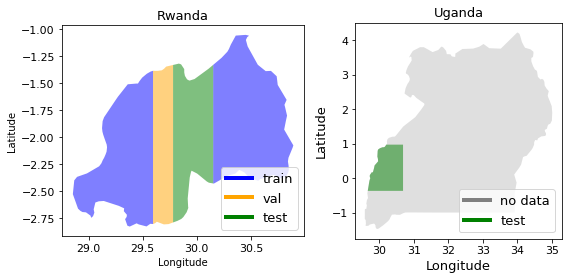

<Figure size 432x288 with 0 Axes>

In [36]:
def plot_v1_small(legend_fontsize=13, title_fontsize=14):
    with open("../data/ground_truth/bounds_v1.geojson") as f:
        bounds = gpd.read_file(f)

    with open("../data/ground_truth/train_300_v1.geojson") as f:
        train300 = gpd.read_file(f)
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4), 
                             gridspec_kw={'width_ratios': [1, 0.85]})

    # first subplot
    bounds[bounds.id == "rw"].plot(color='white', ax=axes[0])
    bounds[bounds.id.str.startswith("rw-tr")].plot(
        color="blue", ax=axes[0], alpha=0.5)
    bounds[bounds.id.str.startswith("rw-va")].plot(
        color="orange", ax=axes[0], alpha=0.5)
    bounds[bounds.id.str.startswith("rw-te")].plot(
        color="green", ax=axes[0], alpha=0.5)
    legend_elem = [
        Line2D([0],[0], color='blue', lw=4, label='train'),
        Line2D([0],[0], color='orange', lw=4, label='val'),
        Line2D([0],[0], color='green', lw=4, label='test')
    ]
    axes[0].legend(handles=legend_elem, loc='lower right', 
                      fontsize=legend_fontsize)
    axes[0].set_xlabel("Longitude")
    axes[0].set_ylabel("Latitude")

    _ = axes[0].set_title("Rwanda", fontsize=13)
    axes[0].tick_params(axis='both', which='major', labelsize=11)
    
    # uganda first plot
    bounds[bounds.id == "ug"].plot(color="grey", alpha=0.25, ax=axes[1])
    bounds[bounds.id == "ug-te-0"].plot(color="green", ax=axes[1], alpha=0.5)
    legend_elem = [
        Line2D([0],[0], color='grey', lw=4, label='no data'),
        Line2D([0],[0], color='green', lw=4, label='test')
    ]
    axes[1].legend(handles=legend_elem, loc='lower right',
                   fontsize=legend_fontsize)
    
    axes[1].set_xlabel("Longitude", fontsize=13)
    axes[1].set_ylabel("Latitude", fontsize=13)
    _ = axes[1].set_title("Uganda", fontsize=13)
    axes[1].tick_params(axis='both', which='major', labelsize=11)
    plt.tight_layout()
    plt.show()
    plt.savefig("data_v1_small.png", dpi=300)

plot_v1_small()

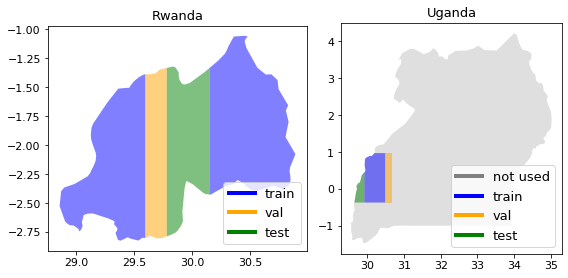

In [39]:
def plot_v2_small(legend_fontsize=13):
    with open("../data/ground_truth/bounds_v2.geojson") as f:
        bounds = gpd.read_file(f)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4), 
                             gridspec_kw={'width_ratios': [1, 0.85]})
    # first plot rwanda
    bounds[bounds.id == "rw"].plot(color='white', ax=axes[0])
    bounds[bounds.id.str.startswith("rw-tr")].plot(
        color="blue", ax=axes[0], alpha=0.5)
    bounds[bounds.id.str.startswith("rw-va")].plot(
        color="orange", ax=axes[0], alpha=0.5)
    bounds[bounds.id.str.startswith("rw-te")].plot(
        color="green", ax=axes[0], alpha=0.5)
    legend_elem = [
        Line2D([0],[0], color='blue', lw=4, label='train'),
        Line2D([0],[0], color='orange', lw=4, label='val'),
        Line2D([0],[0], color='green', lw=4, label='test')
    ]
    axes[0].legend(handles=legend_elem, loc='lower right', 
                   fontsize=legend_fontsize)

    _ = axes[0].set_title("Rwanda", fontsize=13)
    axes[0].tick_params(axis='both', which='major', labelsize=11)

    bounds[bounds.id == "ug"].plot(color="grey", alpha=0.25, ax=axes[1])
    bounds[bounds.id.str.startswith("ug-te")].plot(
        color="green", ax=axes[1], alpha=0.5)
    bounds[bounds.id.str.startswith("ug-tr")].plot(
        color="blue", ax=axes[1], alpha=0.5)
    bounds[bounds.id.str.startswith("ug-va")].plot(
        color="orange", ax=axes[1], alpha=0.5)
    legend_elem = [
        Line2D([0],[0], color='grey', lw=4, label='not used'),
        Line2D([0],[0], color='blue', lw=4, label='train'),
        Line2D([0],[0], color='orange', lw=4, label='val'),
        Line2D([0],[0], color='green', lw=4, label='test')
    ]
    axes[1].legend(handles=legend_elem, loc='lower right',
                      fontsize=legend_fontsize)
   
    _ = axes[1].set_title("Uganda", fontsize=13)
    axes[1].tick_params(axis='both', which='major', labelsize=11)
    plt.tight_layout()
    plt.savefig("data_v2_small.png", dpi=300)
    plt.show()

plot_v2_small()